In [9]:
import math
import torch
import torchvision
import matplotlib.pyplot as plt

In [10]:
# Define data transformation using torchvision.transforms.Compose.
# Compose multiple transformations into one.
data_transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),  # Convert image to tensor
    lambda x: torch.floor(x * 255 / 128).squeeze(dim=0)  # Adjust pixel values
])

# Create MNIST training dataset with specified transformations.
mnist_train = torchvision.datasets.MNIST(
    root='./Datasets/3_Classification_Data',  # Location where data will be saved.
    train=True,  # Indicates training data will be fetched.
    transform=data_transform,  # Apply the defined data transformation.
    download=True  # Download data if not available.
)

# Create MNIST test dataset with specified transformations.
mnist_test = torchvision.datasets.MNIST(
    root='./Datasets/3_Classification_Data',  # Location where data will be saved.
    train=False,  # Indicates test data will be fetched.
    transform=data_transform,  # Apply the defined data transformation.
    download=True  # Download data if not available.
)

In [11]:
image, label = mnist_train[2]
image.shape, label

(torch.Size([28, 28]), 4)

In [12]:
image.shape, image.dtype

(torch.Size([28, 28]), torch.float32)

In [13]:
label, type(label)

(4, int)

In [14]:
images = torch.stack([mnist_train[i][0] for i in range(10, 38)], dim=0)
labels = torch.tensor([mnist_train[i][1] for i in range(10, 38)])
images.shape, labels.shape

(torch.Size([28, 28, 28]), torch.Size([28]))

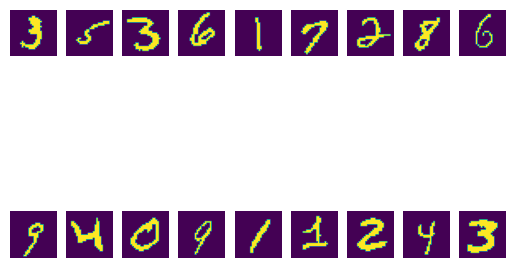

In [15]:
rows, cols = 2, 9

for i in range(rows * cols):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(images[i])
    plt.axis('off')

plt.show()

In [16]:
# tensor X that contains images from MNIST dataset
X = torch.stack([mnist_train[i][0] for i in range(len(mnist_train))], dim=0)

# tensor Y, contining class labels for corresponding images
Y = torch.tensor([mnist_train[i][1] for i in range(len(mnist_train))])

# tensor n_y zeors tensor with lenght of 10 (class count in dataset).
n_y = torch.zeros(10)

# occurencies of every class in training set
for y in range(10):
    n_y[y] = (Y == y).sum()

# propability of every class occurence (P(Y=y)).
P_y = n_y / n_y.sum()

# final propabilities of each class
P_y

tensor([0.0987, 0.1124, 0.0993, 0.1022, 0.0974, 0.0904, 0.0986, 0.1044, 0.0975,
        0.0992])

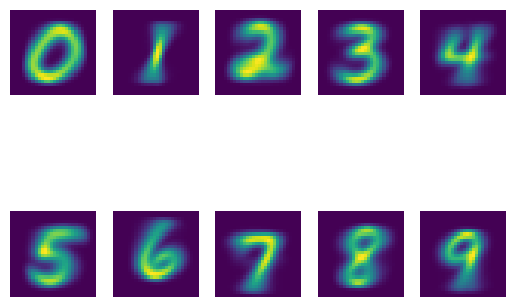

In [17]:
# tensor n_x zeros tensor shape (10, 28, 28),  10 is the number of existing classes, and (28, 28) is image resolution
n_x = torch.zeros((10, 28, 28))

# sum of images in training set
for y in range(10):
    n_x[y] = torch.tensor(X.numpy()[Y.numpy() == y].sum(axis=0))

# conditional probabilities P(X|Y=y) Laplace
# we add 1 to numerator (n_x) and 2 to denominator (n_y) weuse Laplace Smoothing
P_xy = (n_x + 1) / (n_y + 2).reshape(10, 1, 1)

# resulting tensor P_xy contains conditional probabilities for each class (10 classes) and each pixel of the image (28x28)

rows, cols = 2, 5

for i in range(rows * cols):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(P_xy[i])
    plt.axis('off')

plt.show()

In [18]:
# logarithms of the conditional probabilities P(X|Y) and the logarithm of the probabilities P(Y)
log_P_xy = torch.log(P_xy)
log_P_xy_neg = torch.log(1 - P_xy)
log_P_y = torch.log(P_y)

# bayes_pred_stable, we predict the class of the image object
def bayes_pred_stable(x):
    x = x.unsqueeze(0)  # expands the image tensor from (28, 28) to (1, 28, 28)
    p_xy = log_P_xy * x + log_P_xy_neg * (1 - x)
    p_xy = p_xy.reshape(10, -1).sum(axis=1)  # sum of the logarithms P(X|Y) for each class (p(x|y))
    return p_xy + log_P_y  # sums up

py = bayes_pred_stable(image)
py
# tensor py contains logharitms of posteriori propability for each (10) class

tensor([-360.1054, -495.6628, -306.0663, -308.6743, -231.6172, -308.3254,
        -362.6828, -287.2021, -334.3552, -274.5800])

In [19]:
py.argmax(dim=0) == label

tensor(True)

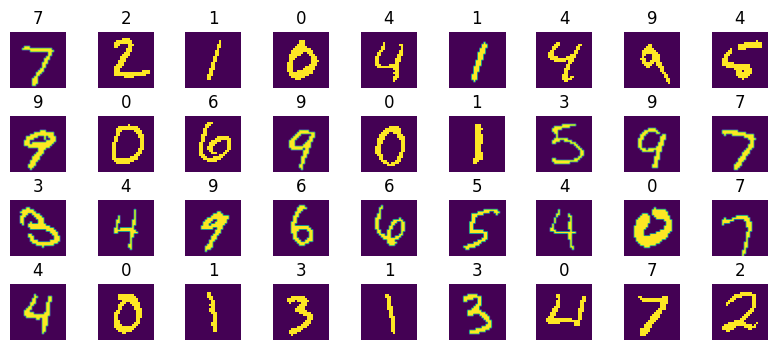

In [20]:
def predict(X):
    return [bayes_pred_stable(x).argmax(dim=0).type(torch.int32).item()
            for x in X]

X = torch.stack([mnist_test[i][0] for i in range(36)], dim=0)
y = torch.tensor([mnist_test[i][1] for i in range(36)])
preds = predict(X)

fig, axs = plt.subplots(4, 9, figsize=(10, 4))
fig.subplots_adjust(hspace=0.5)
for i in range(36):
    ax = axs[i // 9, i % 9]
    ax.imshow(X[i])
    ax.set_title(str(preds[i]))
    ax.axis('off')

plt.show()

Accuracy of predicting class

In [21]:
X = torch.stack([mnist_test[i][0] for i in range(len(mnist_test))], dim=0)
y = torch.tensor([mnist_test[i][1] for i in range(len(mnist_test))])
preds = torch.tensor(predict(X), dtype=torch.int32)
float((preds == y).sum()) / len(y)

0.8427

# Tasks using `scikit-learn`

## Data Preparation
- **Task 1:** Load the file 'customers.csv' into a Pandas DataFrame and clean the data by removing or imputing missing values.
- **Task 2:** Use `LabelEncoder` from the `sklearn.preprocessing` module to convert categorical variables into numerical ones (Spending Score).

In [22]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv('./Datasets/3_Classification_Data/customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [23]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [24]:
df.drop(['CustomerID'], axis=1, inplace=True)
# Create a LabelEncoder for the 'Gender' column
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [25]:
# we can transform spending score to bertter visualise dependencies in dataset via plotting
# we will divide spending score via floor (0 -> score between 0-19, 1 -> 20-39 etc.)
df['Spending Score (1-100)'] = df['Spending Score (1-100)']//20
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,1
1,1,21,15,4
2,0,20,16,0
3,0,23,16,3
4,0,31,17,2
...,...,...,...,...
195,0,35,120,3
196,0,45,126,1
197,1,32,126,3
198,1,32,137,0


## Exploratory Analysis
- **Task 3:** Conduct exploratory data analysis using `pairplot` from seaborn or similar tools.

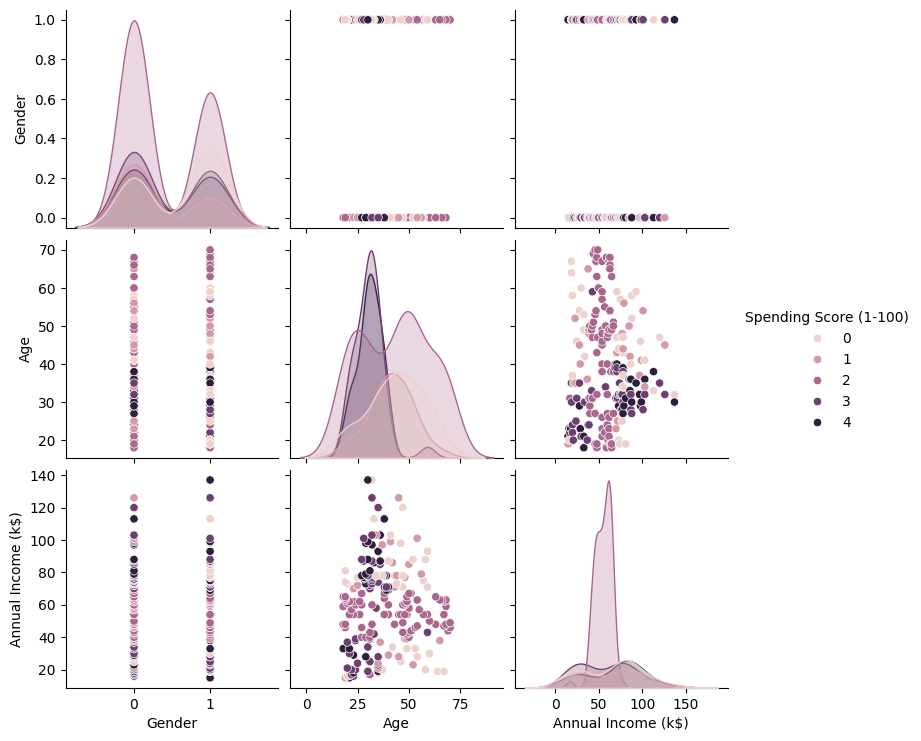

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


# Use pairplot to visualize relationships between numerical variables
sns.pairplot(df, hue="Spending Score (1-100)")
plt.show()

## Data Splitting
- **Task 4:** Split the dataset into training and testing sets using the `train_test_split` function from the `sklearn.model_selection` module.

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=303)

## Building Models
- **Task 5:** Construct a `GaussianNB` model from `sklearn.naive_bayes` to predict a categorical variable.
- **Task 6:** Use `LogisticRegression` from `sklearn.linear_model` to predict a binary variable.
- **Task 7:** Create a `DecisionTreeClassifier` model from `sklearn.tree` for multi-class classification.

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# GaussianNB
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
y_pred_nb = model_nb.predict(X_test)

# LogisticRegression
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

# DecisionTreeClassifier 
model_dtc = DecisionTreeClassifier(max_depth=5)
model_dtc.fit(X_train, y_train)
y_pred_dtc = model_dtc.predict(X_test)

## Model Evaluation
- **Task 8:** Calculate metrics such as accuracy, precision, recall, and F1 score using the `sklearn.metrics` module.
    - For this purpose, use: from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [81]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics for Gaussian Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='weighted')
recall_nb = recall_score(y_test, y_pred_nb, average='weighted')
f1_nb = f1_score(y_test, y_pred_nb, average='weighted')

# Calculate metrics for Logistic Regression
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')

# Calculate metrics for Decision Tree Classifier
accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
precision_dtc = precision_score(y_test, y_pred_dtc, average='weighted')
recall_dtc = recall_score(y_test, y_pred_dtc, average='weighted')
f1_dtc = f1_score(y_test, y_pred_dtc, average='weighted')

# Print the metrics
print("Gaussian Naive Bayes:")
print(f"Accuracy: {accuracy_nb:.2f}")
print(f"Precision: {precision_nb:.2f}")
print(f"Recall: {recall_nb:.2f}")
print(f"F1 Score: {f1_nb:.2f}\n")

print("Logistic Regression:")
print(f"Accuracy: {accuracy_lr:.2f}")
print(f"Precision: {precision_lr:.2f}")
print(f"Recall: {recall_lr:.2f}")
print(f"F1 Score: {f1_lr:.2f}\n")

print("Decision Tree Classifier:")
print(f"Accuracy: {accuracy_dtc:.2f}")
print(f"Precision: {precision_dtc:.2f}")
print(f"Recall: {recall_dtc:.2f}")
print(f"F1 Score: {f1_dtc:.2f}")


Gaussian Naive Bayes:
Accuracy: 0.72
Precision: 0.76
Recall: 0.72
F1 Score: 0.70

Logistic Regression:
Accuracy: 0.52
Precision: 0.46
Recall: 0.52
F1 Score: 0.47

Decision Tree Classifier:
Accuracy: 0.68
Precision: 0.65
Recall: 0.68
F1 Score: 0.64
